# **Лабораторная работе №5. Предварительная обработка данных**

Коптев Данил

**Подключаем библиотеки**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler

**Подготовительные работы**

Читаем файл

In [ ]:
dataAll = pd.read_csv('house_prices.csv')

Определим колличественные параметры в переменную

In [ ]:
dataNum = dataAll.select_dtypes(include=[np.number])

Определим категориальные параметры в переменную

In [ ]:
dataCat = dataAll.select_dtypes(include=[object])

# Задание 1

Выполним масштабирование количественных признаков набораданных House Prices Competition, наиболее сильно коррелирующих с прогнозируемым признаком SalePrice

Для этого определим сильно коррелирующие празнаки с прогнозируемым признаком SalePrice

Для определения сильно коррелирующие празнаков с прогнозируемым признаком SalePrice мы будем использовать ранговую корреляцию, так как: 

• признаки измерены в неметрической (порядковой) шкале,

• скорее всего данные содержат выбросы,

• скорее всего распределение существенно отличается от нормального

<font color='red'>А что с распределением целевого признака *SalePrice*?</font>

**Определим наиболее коррелирующие празнаки с прогнозируемым признаком SalePrice с помощью коэффициента корреляции Спирмена**

Выведем коэффициент корреляции Спирмена прогнозируемым признаком SalePrice для всех колличественных параметрах

In [ ]:
corrSpearman =  dataNum.corr('spearman')
corrSpearman['SalePrice']

Id              -0.018546
MSSubClass       0.007192
LotFrontage      0.409076
LotArea          0.456461
OverallQual      0.809829
OverallCond     -0.129325
YearBuilt        0.652682
YearRemodAdd     0.571159
MasVnrArea       0.421309
BsmtFinSF1       0.301871
BsmtFinSF2      -0.038806
BsmtUnfSF        0.185197
TotalBsmtSF      0.602725
1stFlrSF         0.575408
2ndFlrSF         0.293598
LowQualFinSF    -0.067719
GrLivArea        0.731310
BsmtFullBath     0.225125
BsmtHalfBath    -0.012189
FullBath         0.635957
HalfBath         0.343008
BedroomAbvGr     0.234907
KitchenAbvGr    -0.164826
TotRmsAbvGrd     0.532586
Fireplaces       0.519247
GarageYrBlt      0.593788
GarageCars       0.690711
GarageArea       0.649379
WoodDeckSF       0.353802
OpenPorchSF      0.477561
EnclosedPorch   -0.218394
3SsnPorch        0.065440
ScreenPorch      0.100070
PoolArea         0.058453
MiscVal         -0.062727
MoSold           0.069432
YrSold          -0.029899
SalePrice        1.000000
Name: SalePr

Выберим признаки топ $10$ признаков с наибольшем коэффициентом корреляции Спирмена

In [ ]:
popCorrSpearman = corrSpearman['SalePrice'].sort_values(ascending=False).head(11)
popCorrSpearman

Представленные выше признаки имеют наибольший коэффициент корреляции Спирмена с  прогнозируемый признак SalePrice

На общей таблице видно, что отсутвуют существенные признаки с отрицательным коэффициентом корреляции Спирмена, но все же выполним проверку  

Выберим признаки, y которых коэффициент корреляции Спирмена меньше $-0.1$

In [ ]:
corrSpearman['SalePrice'][corrSpearman['SalePrice']<-0.1]

OverallCond     -0.129325
KitchenAbvGr    -0.164826
EnclosedPorch   -0.218394
Name: SalePrice, dtype: float64

Что и требовалась доказать. Признаки с существенным отрицательным коэффициентом корреляции Спирмена отсутсвуют

**Проведем аналогичные действия с коэффициентом корреляции Кенделла**

Выведем коэффициент корреляции Кенделла прогнозируемым признаком SalePrice для всех колличественных параметрах

In [ ]:
corrKendall =  dataAll.corr('kendall')
corrKendall['SalePrice']

Id              -0.012030
MSSubClass      -0.003979
LotFrontage      0.290361
LotArea          0.314174
OverallQual      0.669660
OverallCond     -0.103492
YearBuilt        0.470960
YearRemodAdd     0.412955
MasVnrArea       0.321250
BsmtFinSF1       0.220879
BsmtFinSF2      -0.030710
BsmtUnfSF        0.127457
TotalBsmtSF      0.435018
1stFlrSF         0.411556
2ndFlrSF         0.232497
LowQualFinSF    -0.055308
GrLivArea        0.543942
BsmtFullBath     0.183182
BsmtHalfBath    -0.009962
FullBath         0.518693
HalfBath         0.278698
BedroomAbvGr     0.185607
KitchenAbvGr    -0.134718
TotRmsAbvGrd     0.410168
Fireplaces       0.412829
GarageYrBlt      0.420842
GarageCars       0.572168
GarageArea       0.478146
WoodDeckSF       0.260349
OpenPorchSF      0.350161
EnclosedPorch   -0.172094
3SsnPorch        0.053478
ScreenPorch      0.080654
PoolArea         0.047800
MiscVal         -0.050917
MoSold           0.049471
YrSold          -0.021796
SalePrice        1.000000
Name: SalePr

Выберим признаки топ $10$ признаков с наибольшем коэффициентом корреляции Кенделла

In [ ]:
popCorrKendall = corrKendall['SalePrice'].sort_values(ascending=False).head(11)
popCorrKendall

SalePrice       1.000000
OverallQual     0.669660
GarageCars      0.572168
GrLivArea       0.543942
FullBath        0.518693
GarageArea      0.478146
YearBuilt       0.470960
TotalBsmtSF     0.435018
GarageYrBlt     0.420842
YearRemodAdd    0.412955
Fireplaces      0.412829
Name: SalePrice, dtype: float64

Представленные выше признаки имеют наибольший коэффициент корреляции Кенделла с  прогнозируемый признак SalePrice

Выберим признаки, y которых коэффициент корреляции Кенделла меньше $-0.1$

In [ ]:
corrKendall['SalePrice'][corrKendall['SalePrice']<-0.1]

OverallCond     -0.103492
KitchenAbvGr    -0.134718
EnclosedPorch   -0.172094
Name: SalePrice, dtype: float64

Признаки с существенным отрицательным коэффициентом корреляции Кенделла отсутсвуют

Составим таблицу наглядного сравнения наиболее коррелирующих признаком по нашим коэффициентам корреляции

In [ ]:
pd.DataFrame({"Spearman": pd.Series(popCorrSpearman.values, index=popCorrSpearman.index), 
              "Kendall": pd.Series(popCorrKendall.values, index=popCorrKendall.index)}).sort_values(['Spearman','Kendall'], ascending=[False, False])

,Spearman,Kendall
SalePrice,1.000000,1.000000
OverallQual,0.809829,0.669660
GrLivArea,0.731310,0.543942
GarageCars,0.690711,0.572168
YearBuilt,0.652682,0.470960
GarageArea,0.649379,0.478146
FullBath,0.635957,0.518693
TotalBsmtSF,0.602725,0.435018
GarageYrBlt,0.593788,0.420842
1stFlrSF,0.575408,NaN


Опишем, что означают колличественные признаки

**OverallQual** - общее качество материала и отделки

Данный параметр на прямую влияет на прогнозируемую стоимость дома, есходя из описания, так как стоимость дома формируется из колличества потреченного на него материалов, и он имеет значительные коэфиценты корреляции

**YearBuilt** -  дата постройки

Данный параметр на прямую влияет на прогнозируемую стоимость дома, есходя из описания, так как чем новее тем, как правило он будет дороже, и он имеет значительные коэфиценты корреляции

**YearRemodAdd** - дата реконструкции

Данный параметр может влияеть на прогнозируемую стоимость дома, есходя из описания, но не значительно, исходя из его коэфицента корреляции. 

**TotalBsmtSF** - площадь подвала

Данный параметр может влияеть на прогнозируемую стоимость дома, исходя из описания, так как чем больше площадь подвала, тем больше может оказаться тем, тем дороже, но не значительно исходя из коэфицента корреляции 

**1stFlrSF** - площадь первого этажа

Данный параметр не вошел в топ 10 по коэфиценту корреляции Кендала, но имеется в топ 10 по коэфиценту корреляции Спирмена. Данный параметр имеет слабую корреляцию, но по описанию набора данных он может иметь высокую зависимоть

**GrLivArea** - площадь жилой земли

Данный параметр значительно влияет на прогнозируемую стоимость дома, есходя из описания, так как чем больше площадь участка, тем дороже дом, а так же у параметра высокий положительный коэфицент корреляции 

**FullBath** - колличество ванных комнат

Данный параметр может влияеть на прогнозируемую стоимость дома, есходя из описания, так как чем больше ванных комнат, тем дороже, но не значительно исходя из коэфицента корреляции 

**Fireplaces** - количество каминов 

Данный параметр не вошел в топ 10 по коэфиценту корреляции Спирмена, но имеется в топ 10 по коэфиценту корреляции Кендала. Данный параметр имеет слабую корреляцию, но по описанию набора данных он может иметь высокую зависимоть

**GarageYrBlt** - год постройки гаража

Данный параметр может влияеть на прогнозируемую стоимость дома, есходя из описания, но не значительно, исходя из его коэфицента корреляции. 

**GarageCars** - мест для автомобиля в гараже

Данный параметр может влияеть на прогнозируемую стоимость дома, есходя из описания, и он имеет значительны коэфицент корреляции. Так же данный параметр имеет схожее происхождение с параметром GarageArea, поэтому имеет смысл оставить только один из этих параметров, но так как коэфицент корреляции больше именно у GarageCars, то логичнее оставить его

**GarageArea** - площадь гаража

Данный параметр может влияеть на прогнозируемую стоимость дома, есходя из описания, и он имеет значительны коэфицент корреляции. Так же данный параметр имеет схожее происхождение с параметром GarageCars, поэтому имеет смысл оставить только один из этих параметров

**Для дальнейшего анализа выберим следующие признаки:**

OverallQual

GrLivArea

GarageCars

YearBuilt

FullBath

<font color='red'>На каком основании вы уже сейчас отбросили часть признаков? Если вы решили вместо топ-10 взять топ-5, то почему взяли именно *FullBath*, а не *GarageArea* (коэффициент корреляции Спирмена был выше)? И сразу так резко ограничивать число признаков для модели может привести к проблемам в будущем: достаточно ли будет именно этих пяти признаков для предсказания цены?</font>

In [ ]:
dataNum = dataNum[['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'FullBath', 'SalePrice']]
dataNum

,OverallQual,GrLivArea,GarageCars,YearBuilt,FullBath,SalePrice
0,7,1710,2,2003,2,208500
1,6,1262,2,1976,2,181500
2,7,1786,2,2001,2,223500
3,7,1717,3,1915,1,140000
4,8,2198,3,2000,2,250000
...,...,...,...,...,...,...
1455,6,1647,2,1999,2,175000
1456,6,2073,2,1978,2,210000
1457,7,2340,1,1941,2,266500
1458,5,1078,1,1950,1,142125


**Проверим корреляцию признаков между собой по коэффициенту корреляции Спирмена**


In [ ]:
dataNum.corr('spearman')

,OverallQual,GrLivArea,GarageCars,YearBuilt,FullBath,SalePrice
OverallQual,1.000000,0.603262,0.608756,0.647392,0.576372,0.809829
GrLivArea,0.603262,1.000000,0.505094,0.288493,0.658419,0.731310
GarageCars,0.608756,0.505094,1.000000,0.601519,0.518310,0.690711
YearBuilt,0.647392,0.288493,0.601519,1.000000,0.537420,0.652682
FullBath,0.576372,0.658419,0.518310,0.537420,1.000000,0.635957
SalePrice,0.809829,0.731310,0.690711,0.652682,0.635957,1.000000


У выделяемых признаков, наблюдается значительная корреляция между собой, за исключением YearBuilt и GrLivArea.

<font color='red'>

1) Если под "значительной" вы имеете в виду сильную корреляцию - то ее как раз нет ни у одной пары количественных признаков, коэффициенты ниже 0,7.
2) Если вы имели в виду "значимая" - то как раз значимость найденных коэффциентов корреляции вы не проверяли. Делать выводы по значениям вычисленных коэффициентов корреляции можно только после того, как вы проверите их значимость.    
Нужно было: сформулировать гипотезы (хотя бы один раз в общем виде) и, например, вычислить уровень значимости *p-value* (либо вычислить эмпирическое значение и критическую точку соотвествующего критерия) и сравнить его с заранее выбранным уровнем значимости $\alpha$.  
3) Если вы действительно считаете, что у всех пар количественных признаков наблюдается значительная корреляция, то по заданию для таких пар требовалось попробовать интерпретировать эту связь на основе описания признаков и далее "из пары явно и сильно зависимых признаков оставлять один". Вот на этом этапе имеет смысл сокращать первоначально отобранный топ-10, вместо того, чтобы сразу обрезать его до топ-5 (на этом этапе у вас были бы основания из пары двух признаков отобросить один).


</font>

**Выполним попарную визуализацию**

Построим диаграммы рассеяния с линией тренда

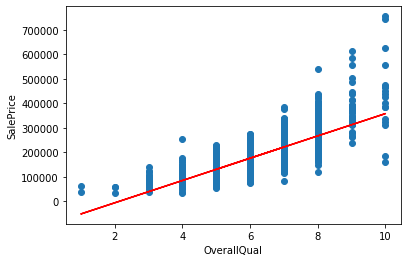

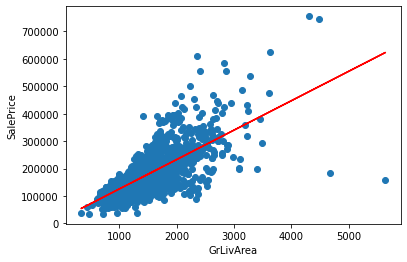

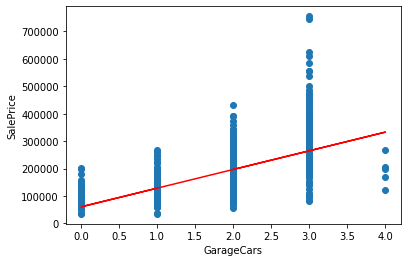

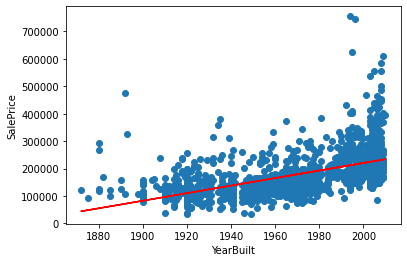

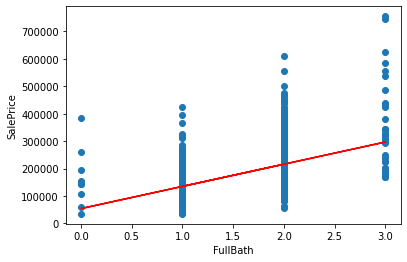

In [ ]:
for data in dataNum :
  if  data != "SalePrice":
    z = np.polyfit(dataNum[data], dataNum['SalePrice'], 1 )
    p = np.poly1d(z)
    plt.scatter(x = dataNum[data], y = dataNum['SalePrice'])
    plt.xlabel(data)
    plt.ylabel("SalePrice")
    plt.plot (dataNum[data], p(dataNum[data]), color="red") 
    plt.show()

**OverallQual** - имеется положительная корреляция, зависимость близка к линейному

**GrLivArea**  - имеется положительная корреляция, зависимость близка к линейному

**GarageCars** - имеется положительная корреляция, зависимость близка к линейному, но смущает последние значения параметра, видимо наблюдается аномалия

**YearBuilt** - имеется положительная корреляция, но зависимость явно оличается от линейной

**FullBath** - имеется положительная корреляция, зависимость близка к линейному

**Логарифмируем значения признаков, отличающийся от линейной зависимости**

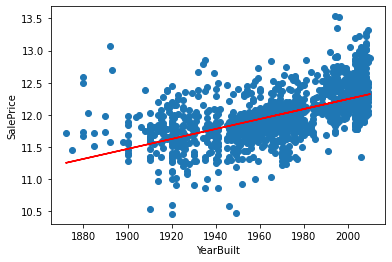

In [ ]:
x = dataNum['YearBuilt']
y = np.log(dataNum['SalePrice'])

z = np.polyfit(x, y, 1 )
p = np.poly1d(z)
plt.scatter(x = x, y = y)
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.plot (x, p(x), color="red") 
plt.show()

Взаимосвязь между SalePrice и YearBuilt имеет экспоненциальный характер. Эта связь не линейная.

<font color='red'>А логарифмировать *SalePrice* не нужно?</font>

In [ ]:
#присвоим логарифмическое значение YearBuilt в наши данные
dataNum['YearBuilt'] = np.log(dataNum['YearBuilt'])

**Выполним стандартизацию значений подготовленных признаков**

In [ ]:
def descriptionSampling(X):
  print('Средние значения: ',  np.round(np.mean(X, axis = 0), 5))
  print('Среднеквадратические отклонения: ',  np.round(np.std(X, axis = 0),5), '\n')

dataNumArray = np.array(dataNum[['OverallQual',	'GrLivArea', 'GarageCars', 'YearBuilt', 'FullBath']])
standardScaler = StandardScaler()
standardScaler.fit(dataNumArray)
dataNumStandard = standardScaler.transform(dataNumArray)
descriptionSampling(dataNumStandard)

dataNumStandard

Средние значения:  [ 0. -0.  0. -0.  0.]
Среднеквадратические отклонения:  [1. 1. 1. 1. 1.] 



array([[ 0.65147924,  0.37033344,  0.31172464,  1.04517725,  0.78974052],
       [-0.07183611, -0.48251191,  0.31172464,  0.16344807,  0.78974052],
       [ 0.65147924,  0.51501256,  0.31172464,  0.98027277,  0.78974052],
       ...,
       [ 0.65147924,  1.56964722, -1.02685765, -0.99763892,  0.78974052],
       [-0.79515147, -0.83278768, -1.02685765, -0.69708612, -1.02604084],
       [-0.79515147, -0.49393395, -1.02685765, -0.19923402, -1.02604084]])

После применения стандартизации все признаки имеют среднее значение, равное 0 и дисперсию, равную 1, но как мы видим

# Задание 2

Выполнить бинарное кодирование категориальных признаков набораданных House Prices Competition, наиболее сильно связанных с прогнозируемым признаком SalePrice.

Для определения наиболее коррелирующий

<font color='red'>Корреляция - это у количественных признаков. С качественным признаком может быть связь, но не корреляция.</font>

<ipython-input-737-267f561671d6>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.subplots(figsize=(12, 8))


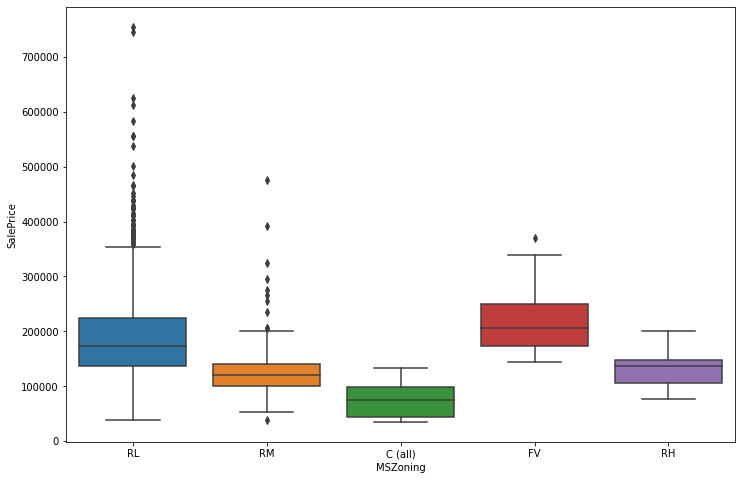

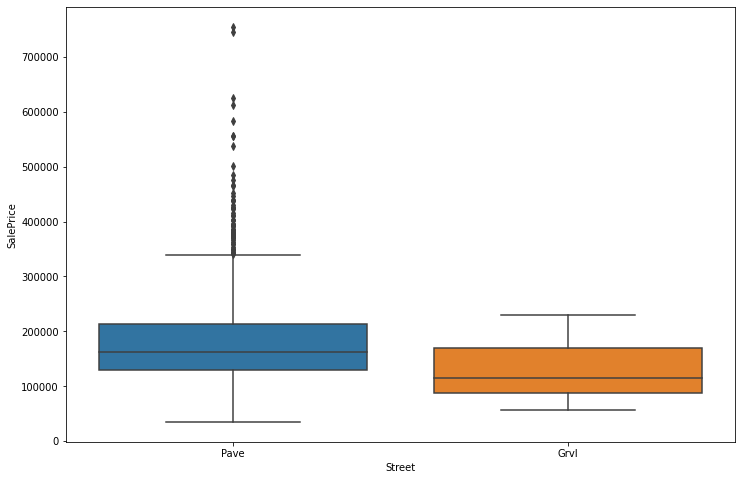

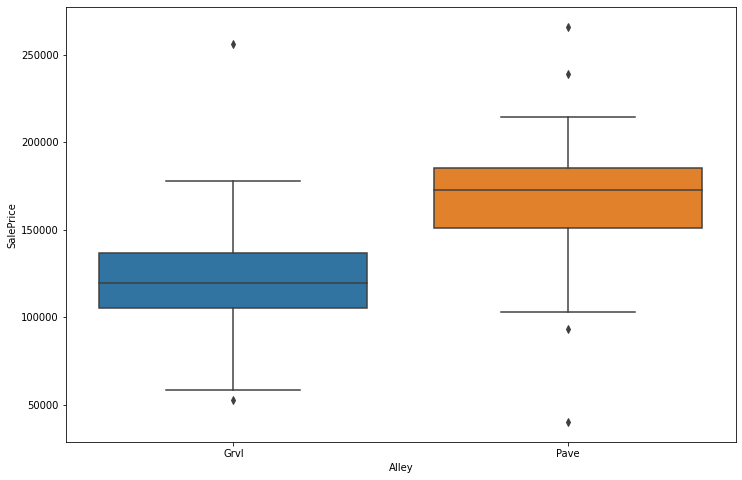

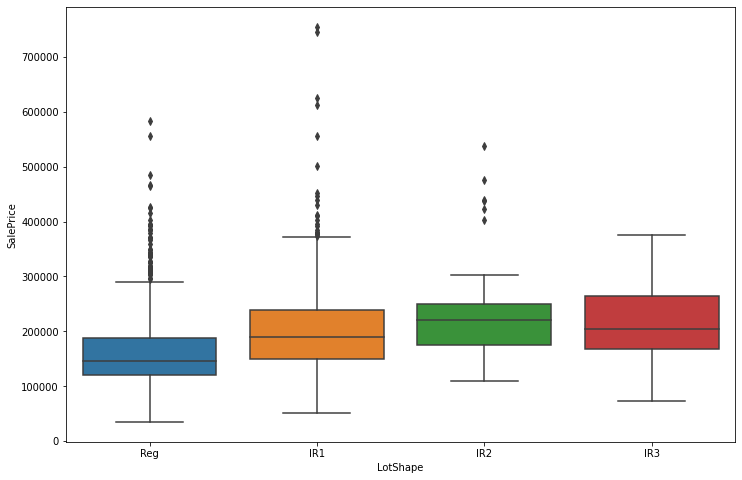

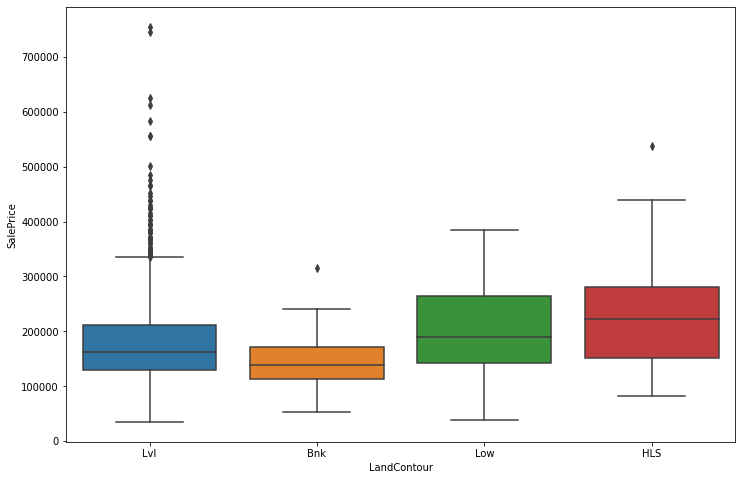

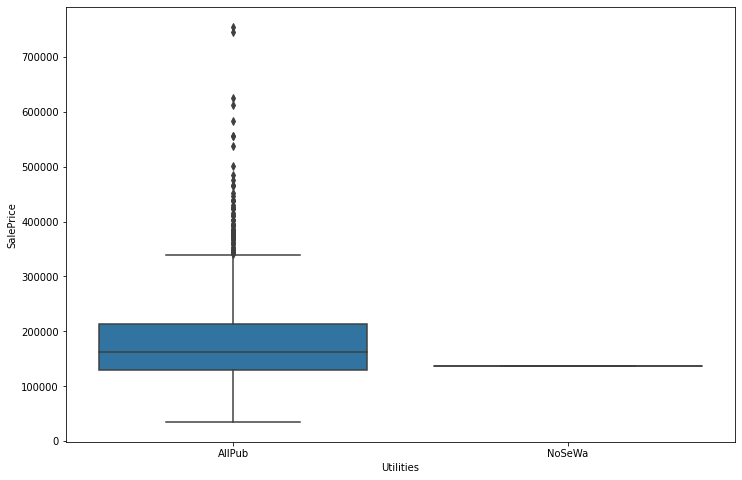

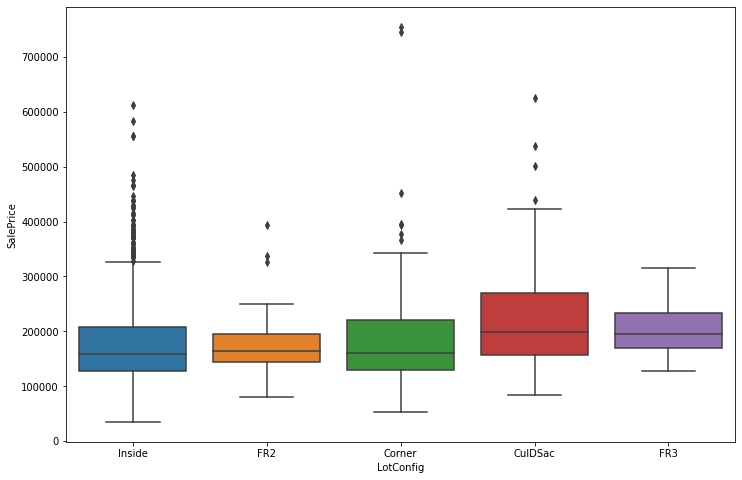

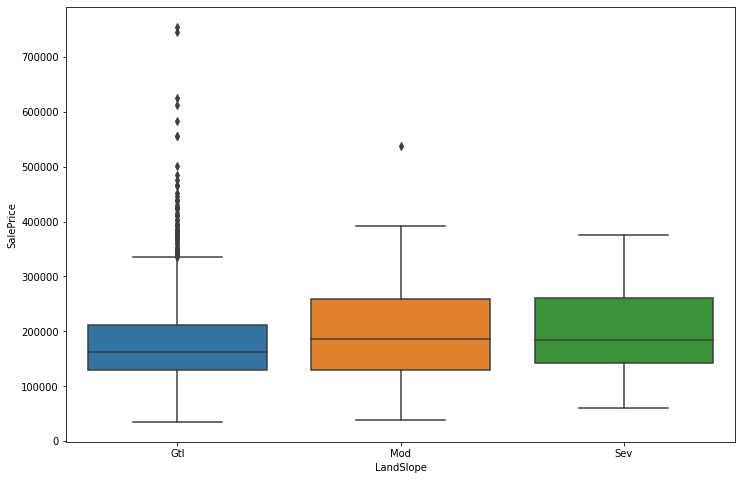

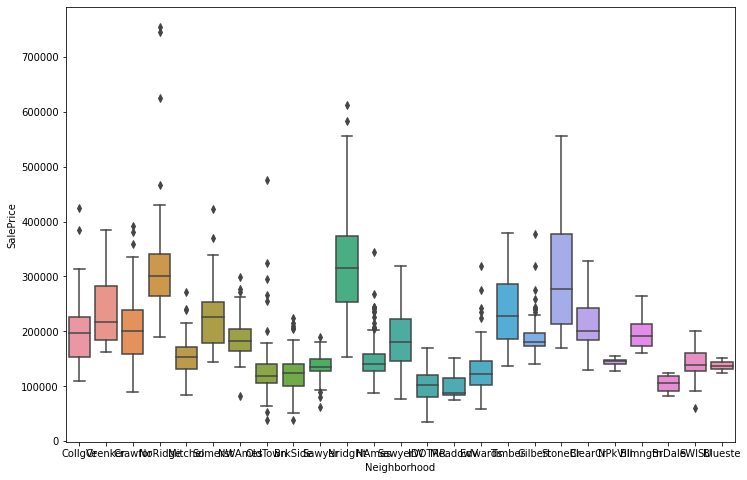

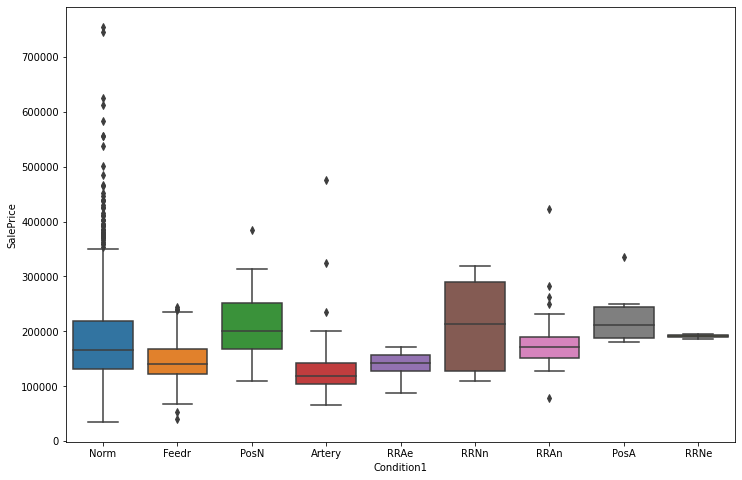

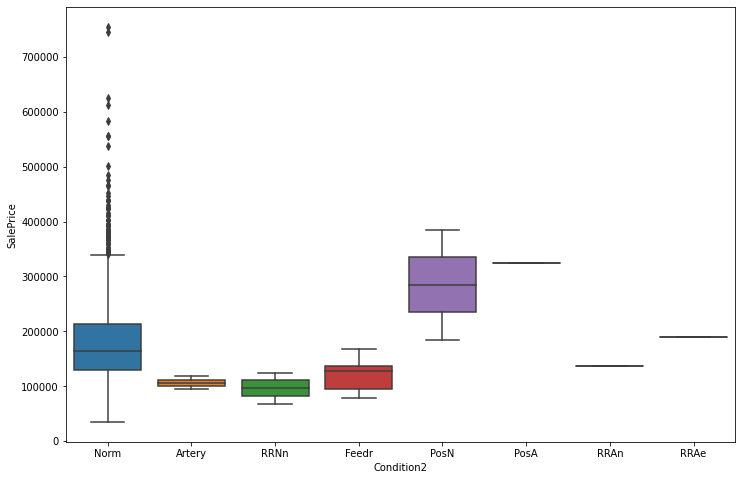

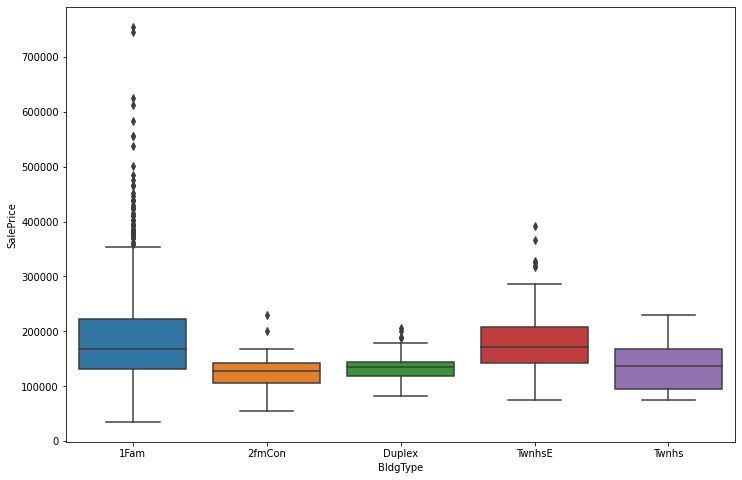

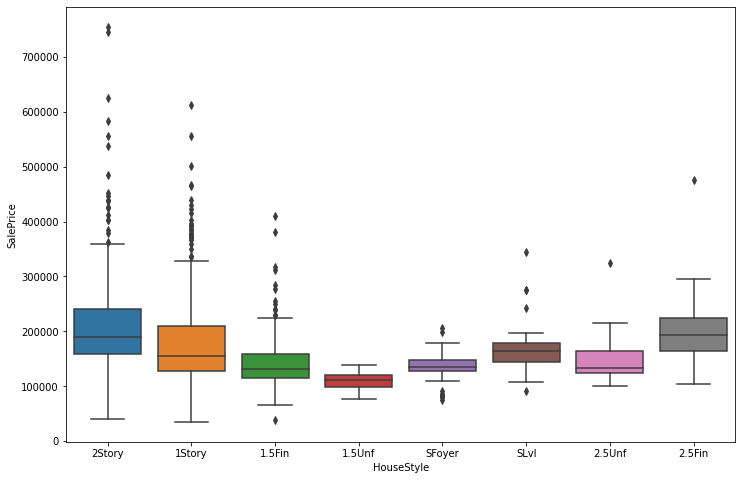

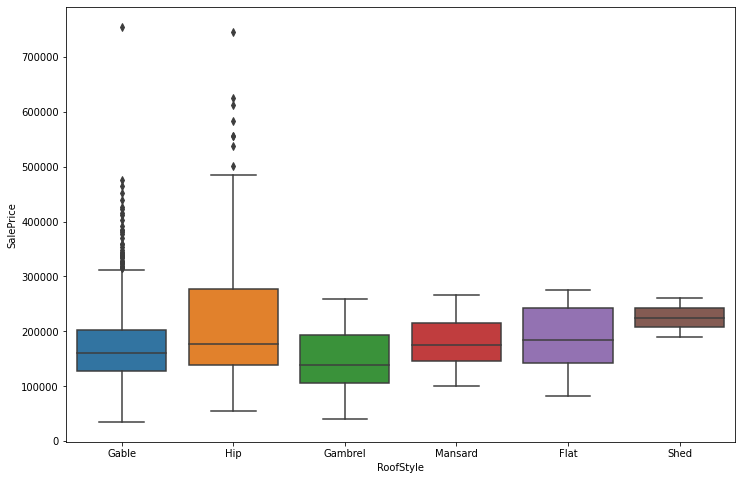

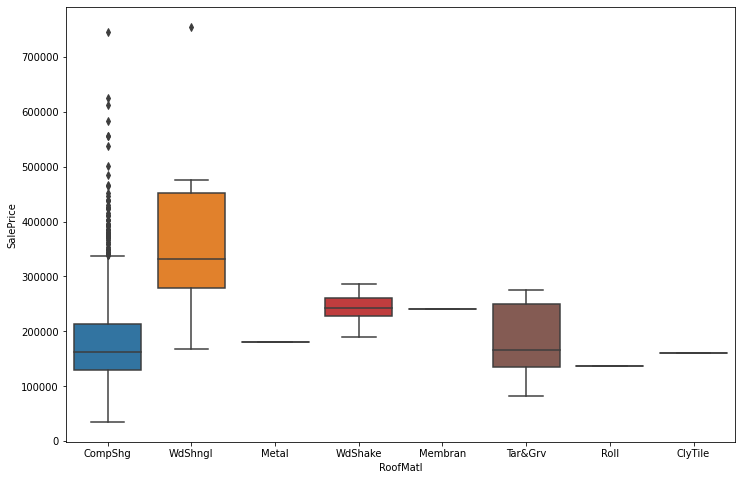

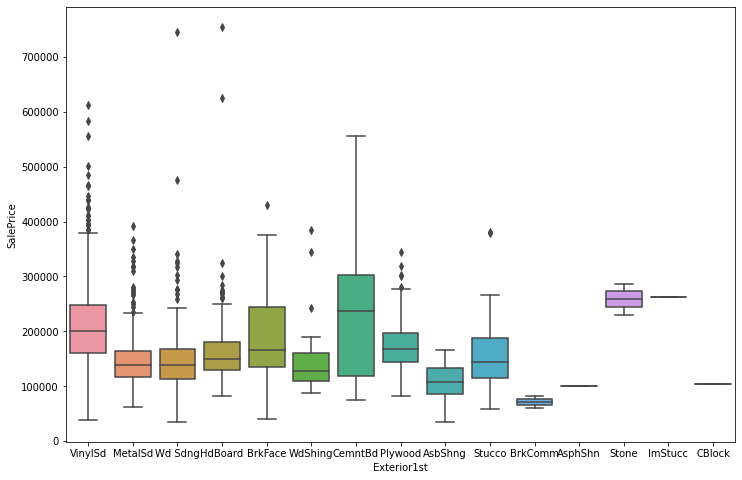

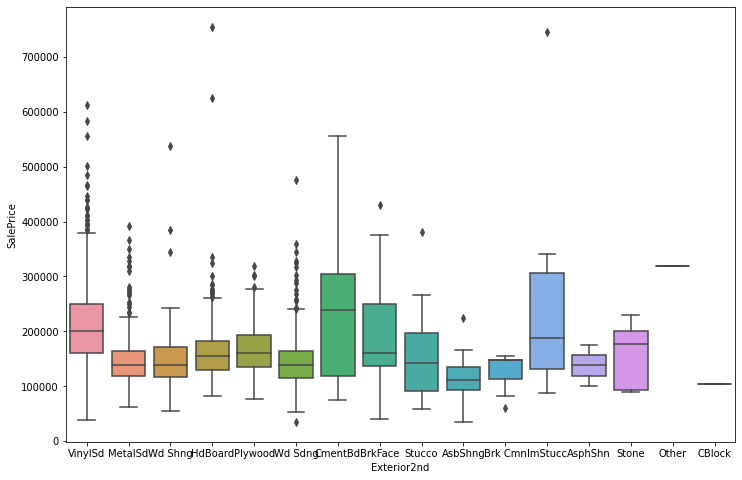

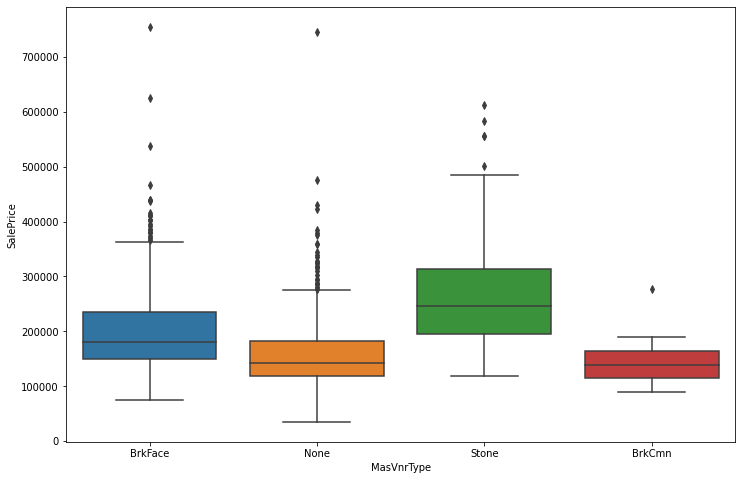

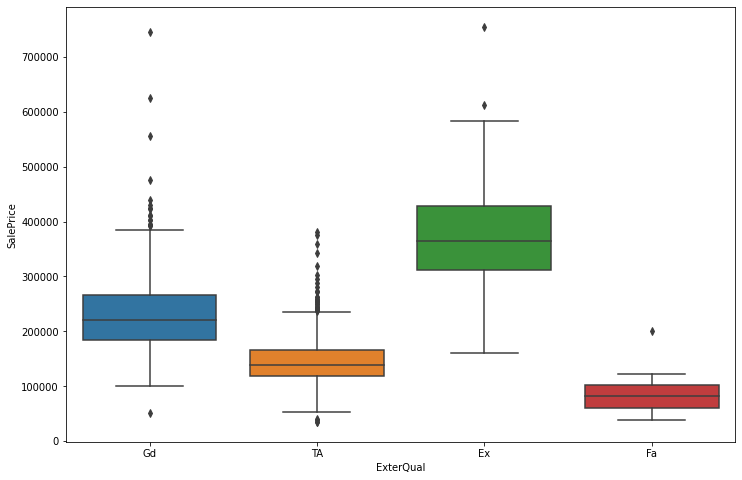

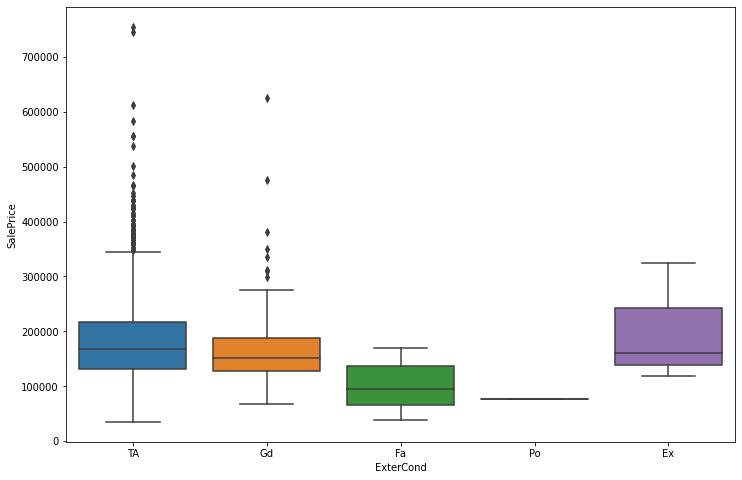

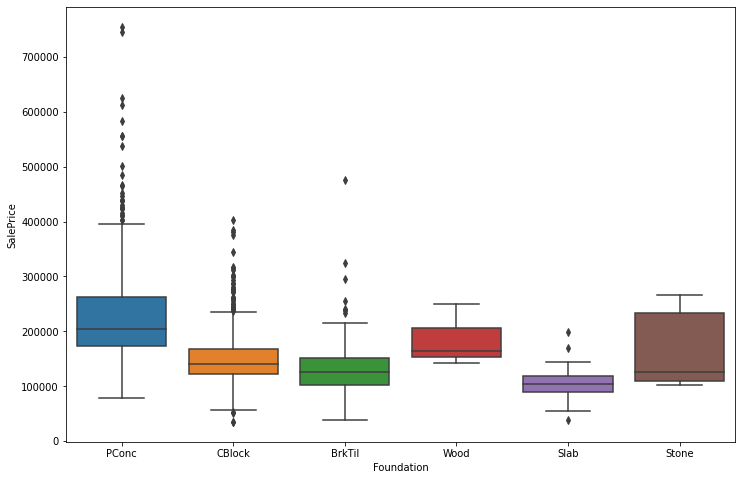

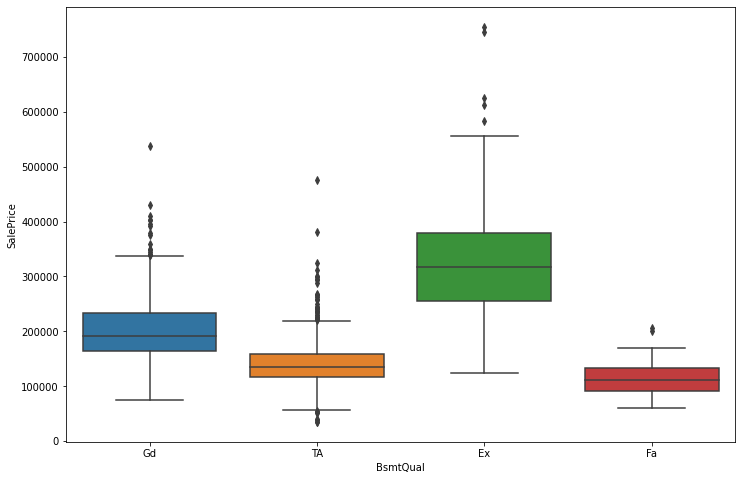

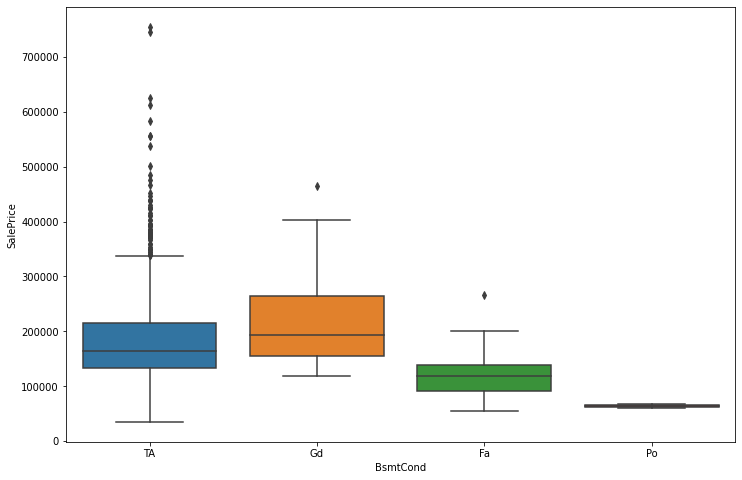

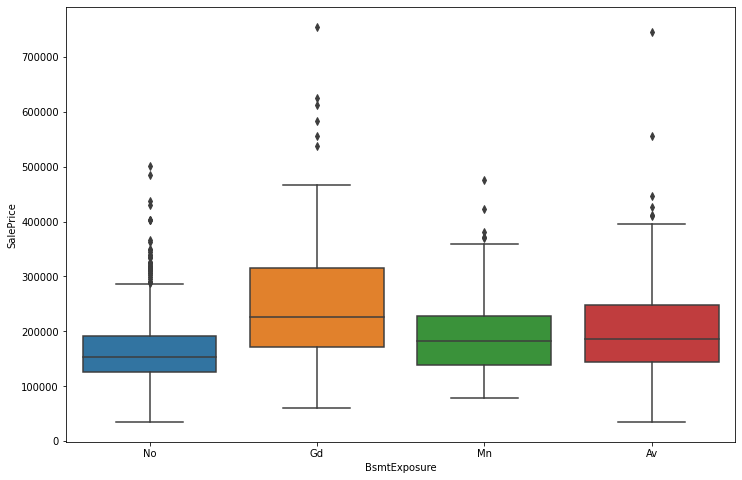

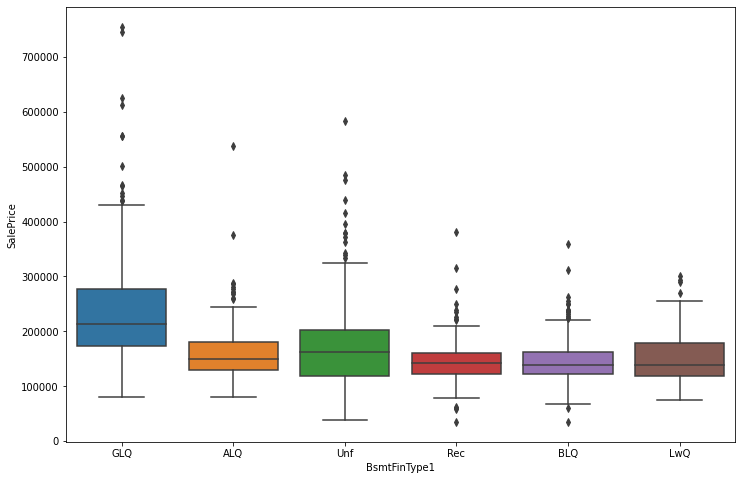

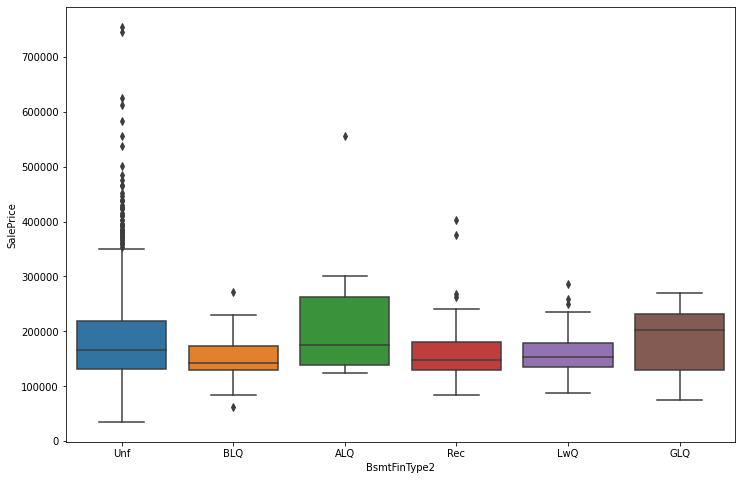

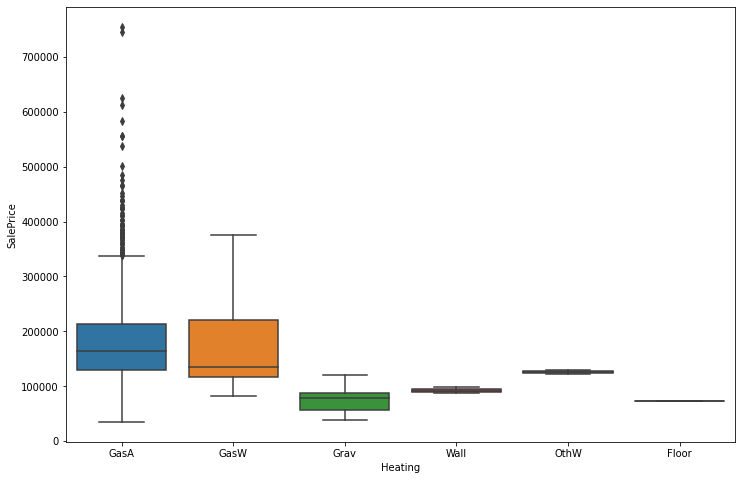

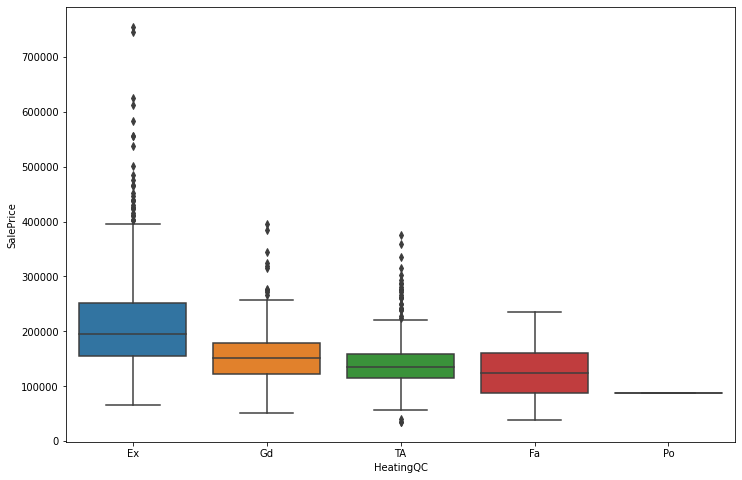

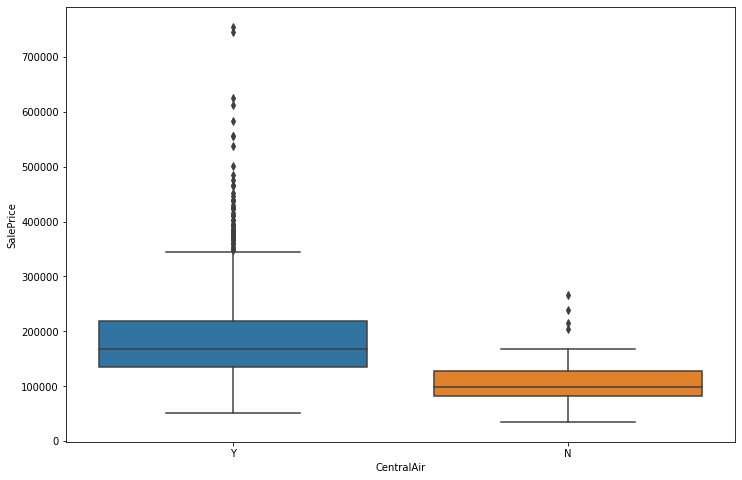

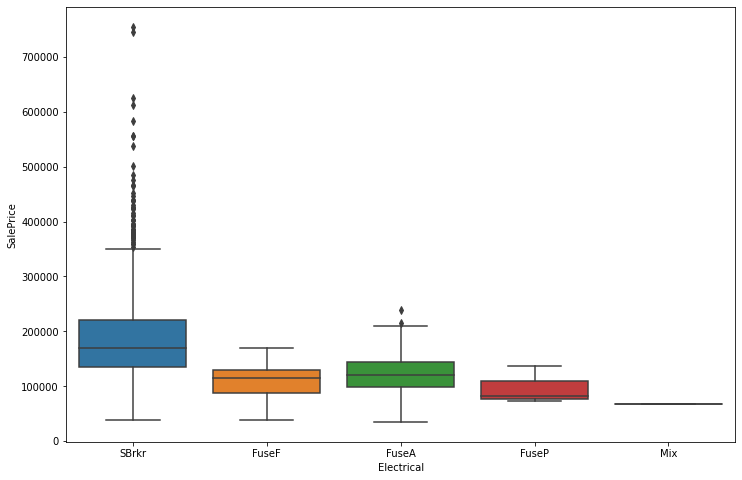

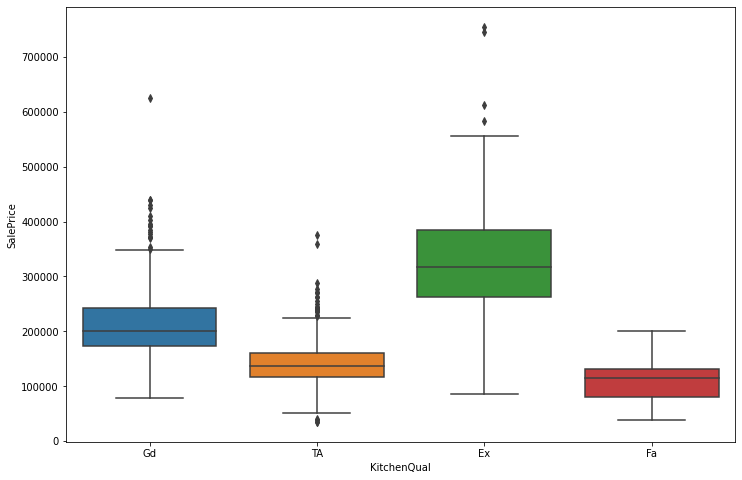

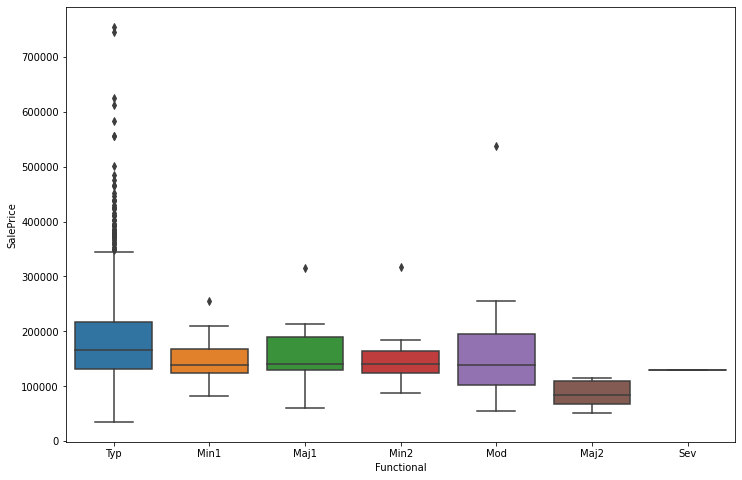

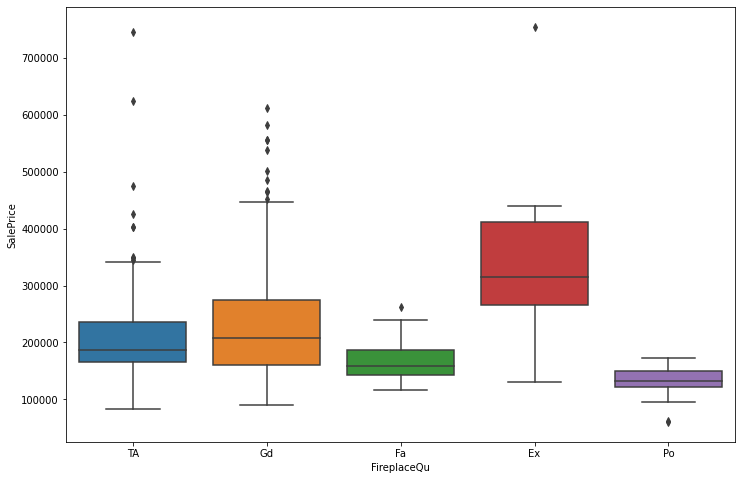

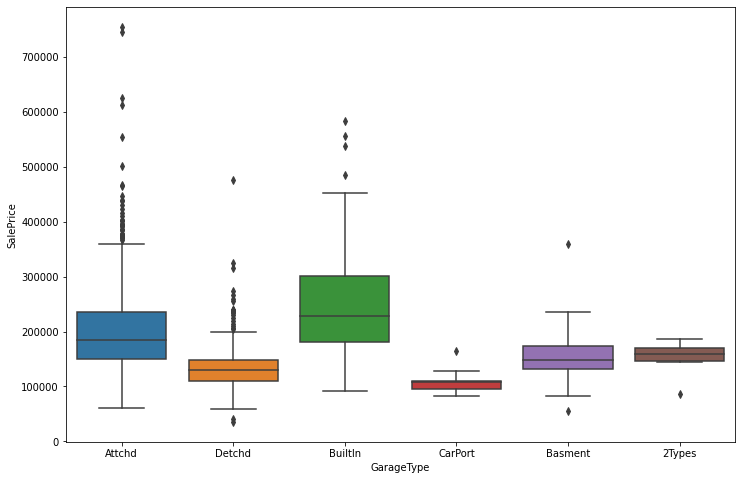

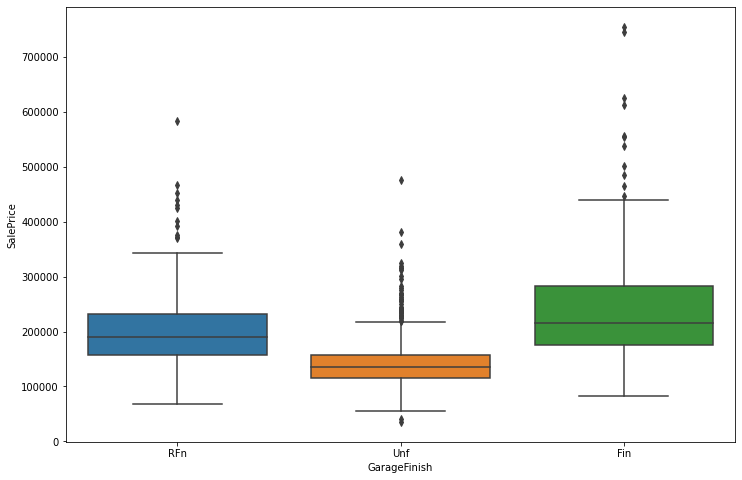

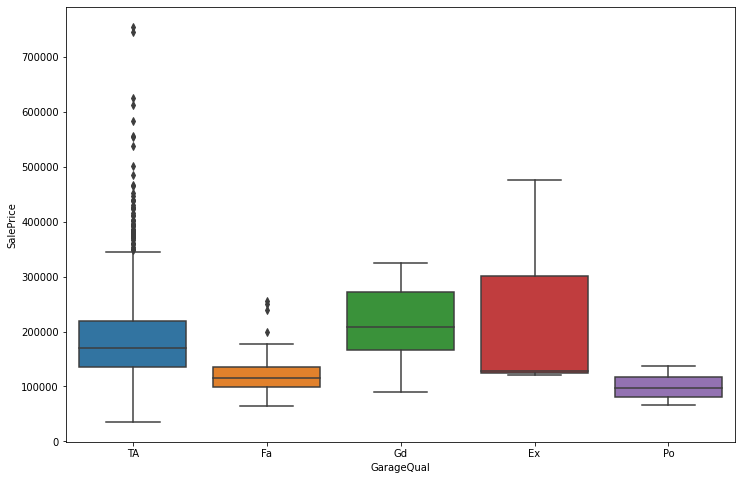

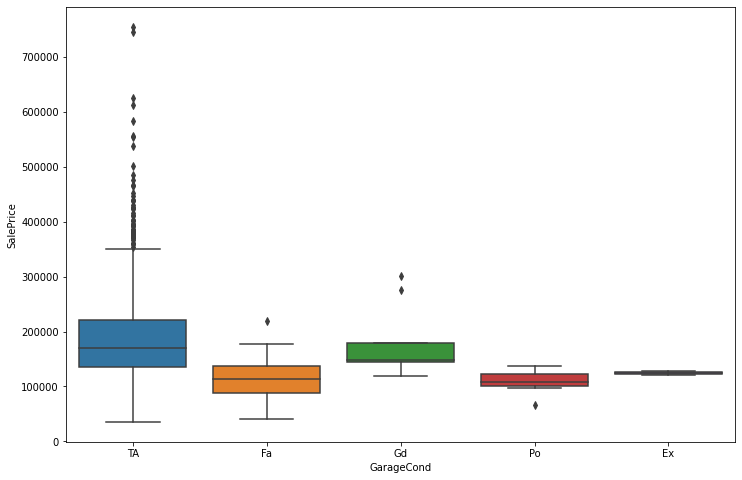

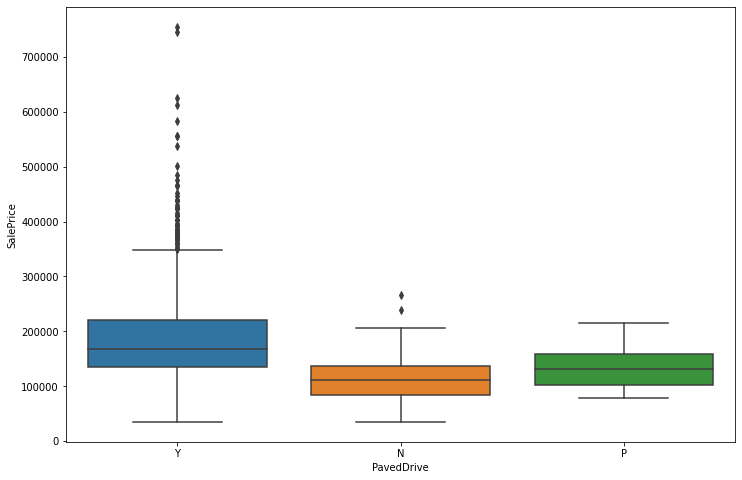

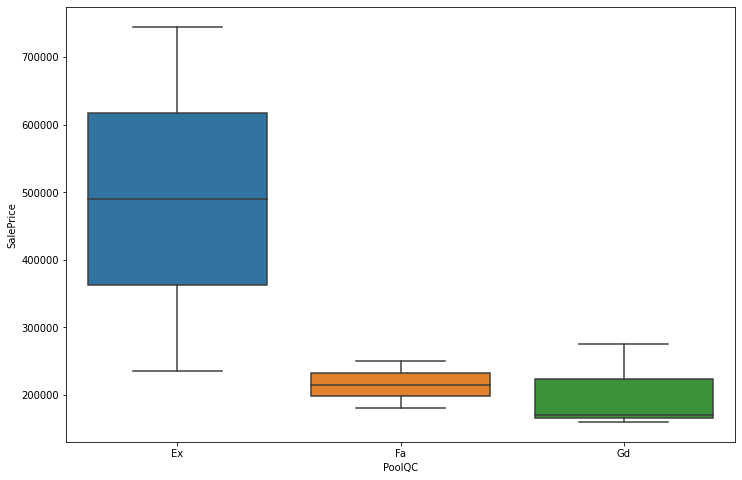

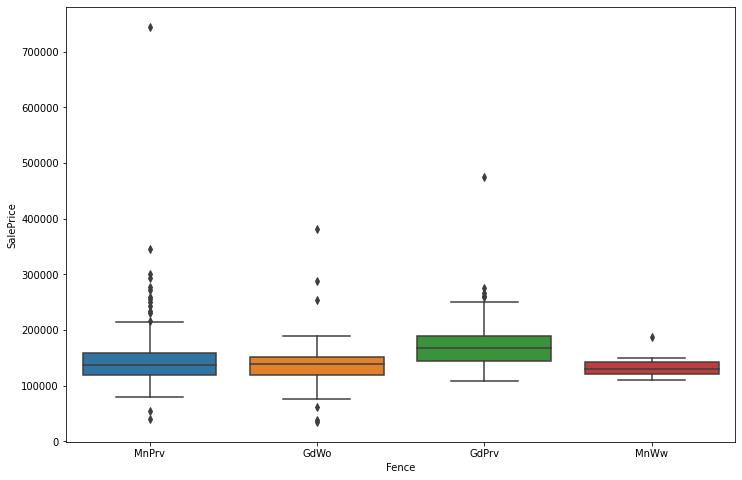

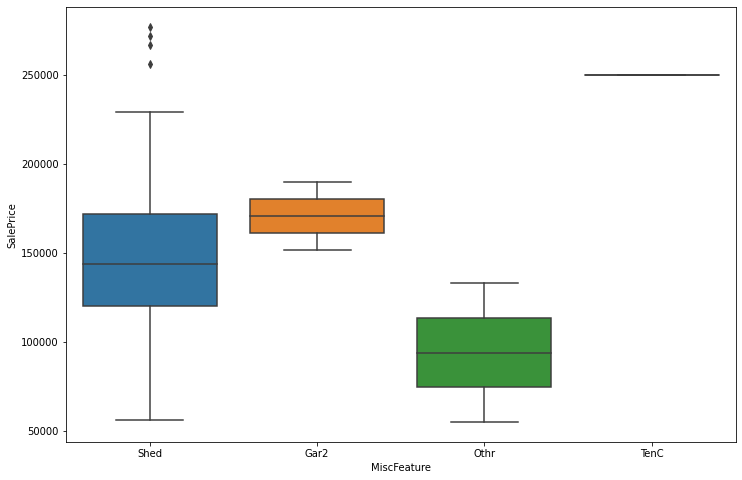

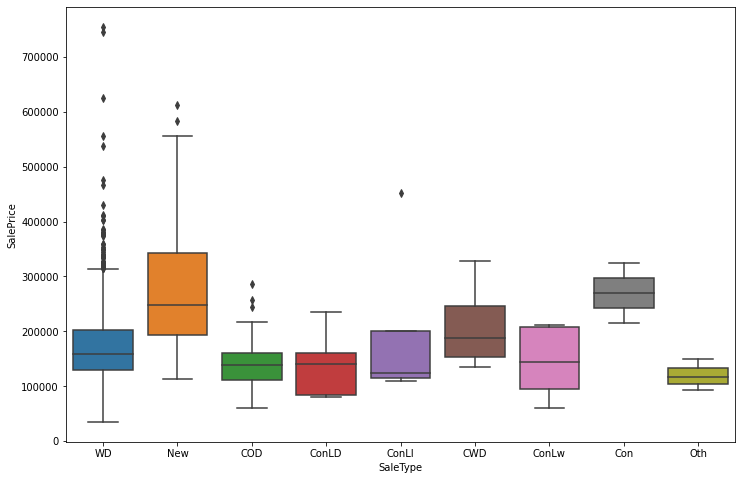

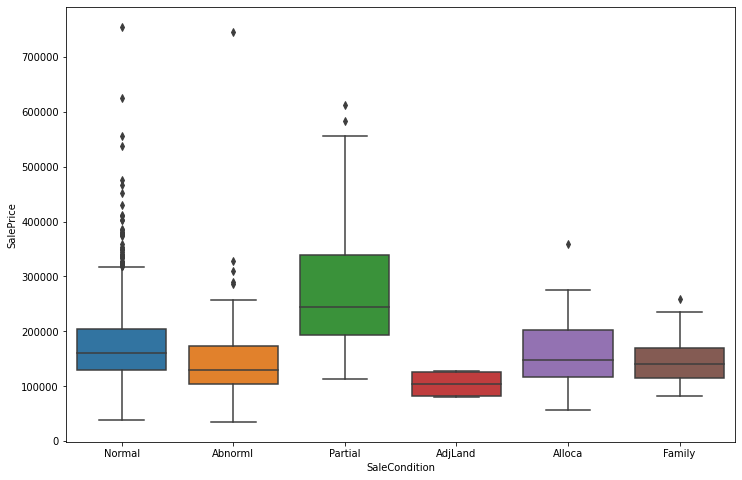

In [ ]:

for titleData in dataCat.columns :
  plt.subplots(figsize=(12, 8))
  sns.boxplot(x=titleData, y="SalePrice", data=dataAll)


На основание различных значений категориальных признаков и соостветсвие им разных значений прогназируемой цены мы можем выделить данные признаки: 


* Neighborhood
* Condition1
* Condition2
* RoodMatl
* ExterQual
* BsmtQual
* BsmtCond
* CentralAir
* KitchenQual
* GarageType
* GarageFinish
* PoolQC
* MiscFeature



<font color='red'>

1) На каком основании? Почему вы из 43 категориальных признаков оставили именно эти 13? Только на основании визуальной оценки ящиков с усами (и учитывалось ли описание набора данных)? А как именно вы совершали выбор? Почему, например, вы решили, что кровельный материал (признак *RoofMatl*) сильнее связан с ценой дома, чем качество и состояние отопления (признак *HeatingQC*)? И у одного, и у другого признака ящики с усами говорят о (потенциальной) связи с ценой дома. И т.д.   
Ящики с усами говорят о потенциальной связи с ценой дома (и можно отбросить заведомо не связанные с ценой признаки), но никак не позволяют точно оценить значимая ли это связь, а если значимая - то насколько сильная. Это можно оценить только с помощью числовых характеристик: критерий хи-квадрат (значимость связи) и коэффициент Крамера (сила связи). По крайней мере, из изучавшегося вами инструментария (так есть и другие методы). Руководствоваться описанием признаков при отборе тоже надо (но опять же непонятно, почему вы решили, что отопление менее важно, чем материал крыши), но только его не достаточно.
2) Нельзя использовать признаки с большим числом пропущенных значений. Даже если вы заполните пропущенные значения каким-либо образом, то все равно такой признак не будет отражать реальное положение дел (слишком много "искуственных" значений), а поэтому он заведомо бесполезен для будущей модели. Так что признак *PoolQC*, у которого всего 7 непустых значений (!) нельзя включать в ваш топ признаков.

</font>




**Сокротим колличество до 5, выбирая наиболее зависимы**

<font color='red'>А как вы так заранее решили, что таких признаков будет именно 5?</font>

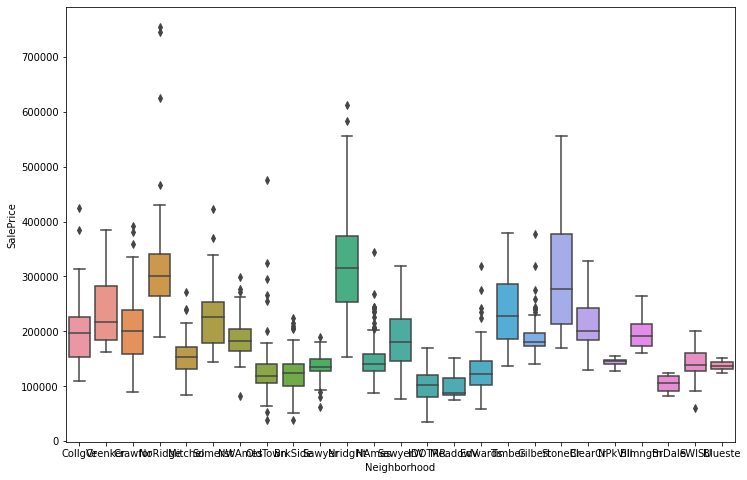

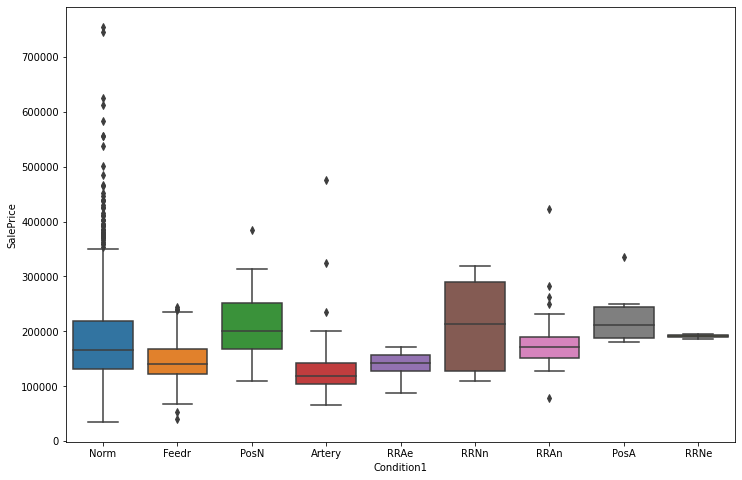

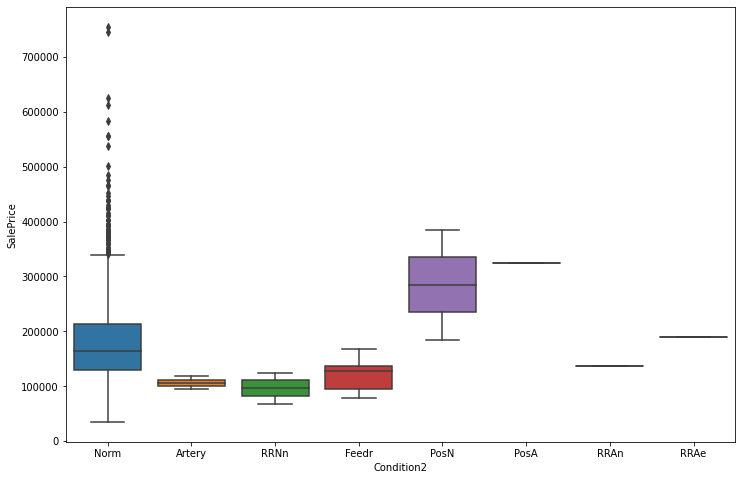

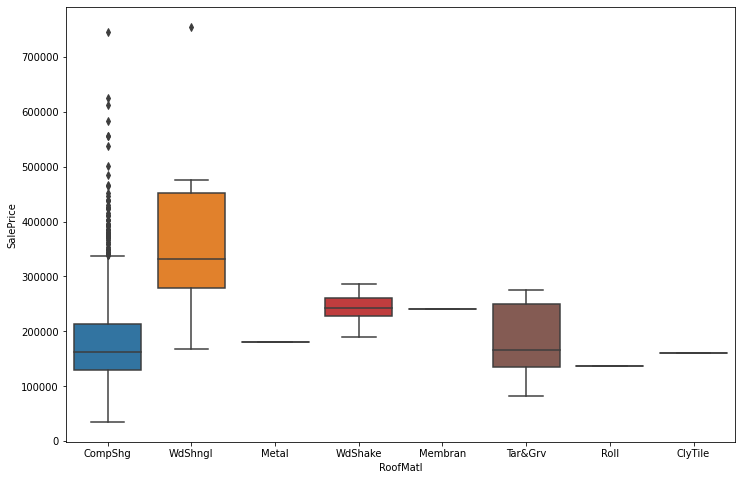

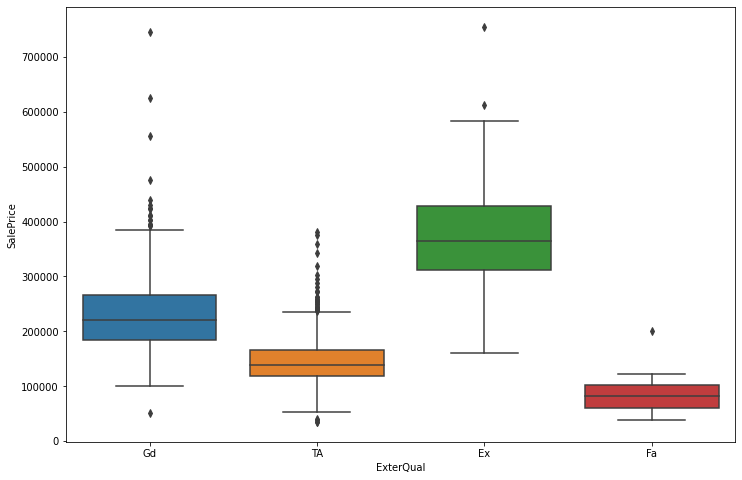

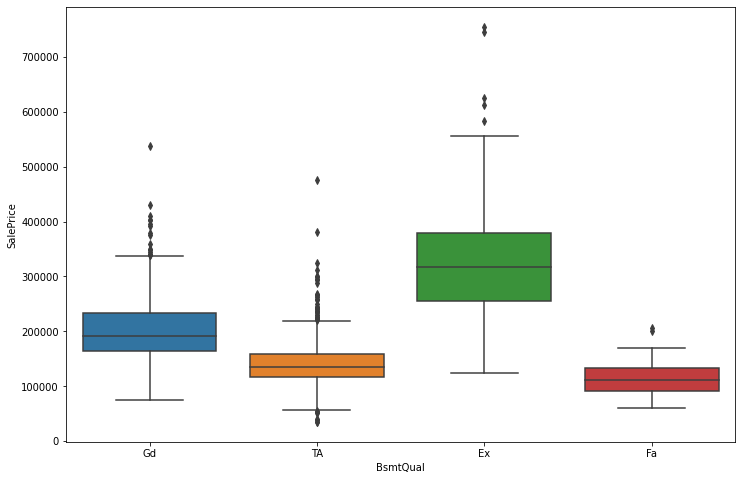

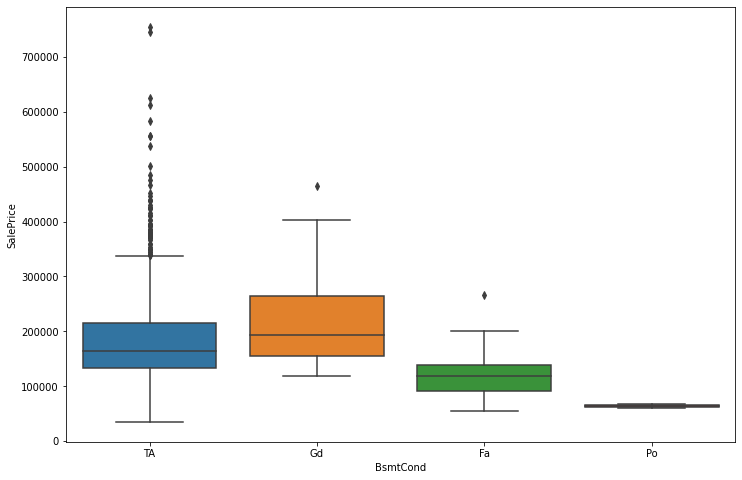

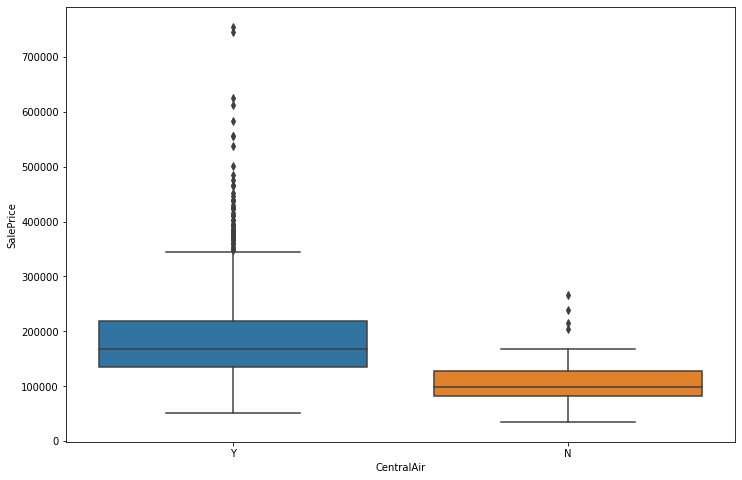

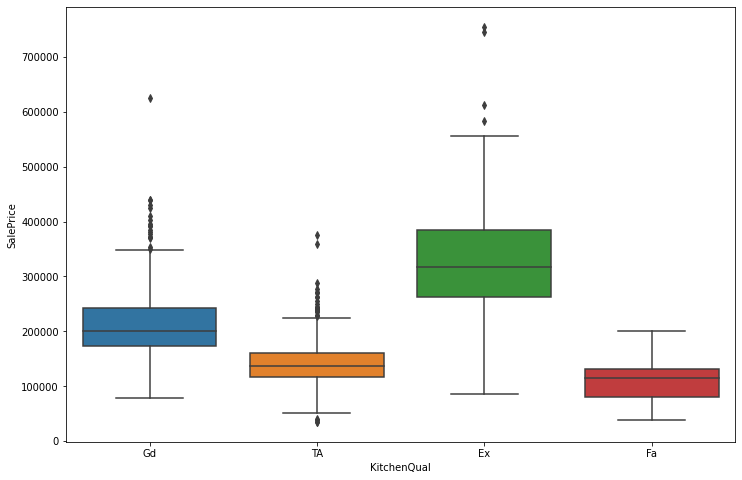

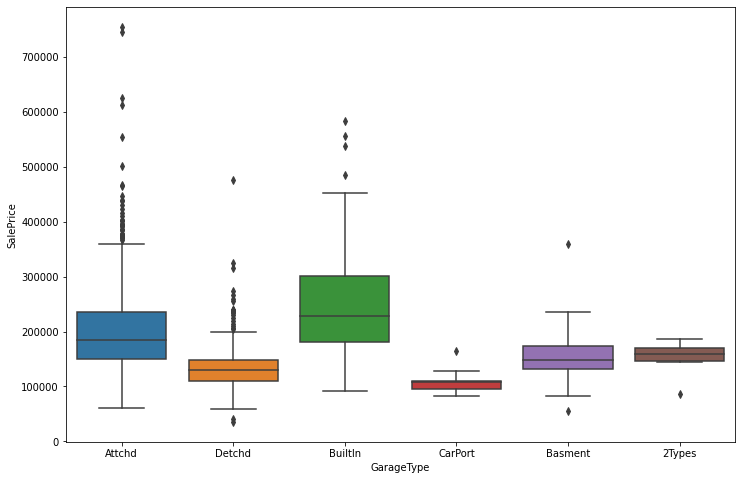

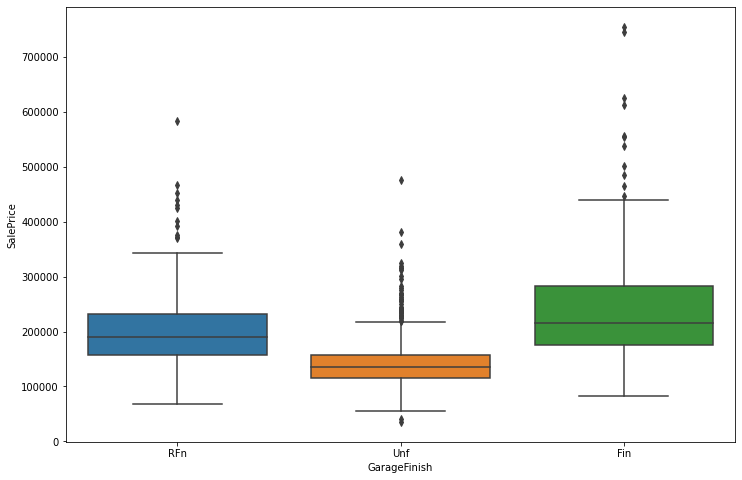

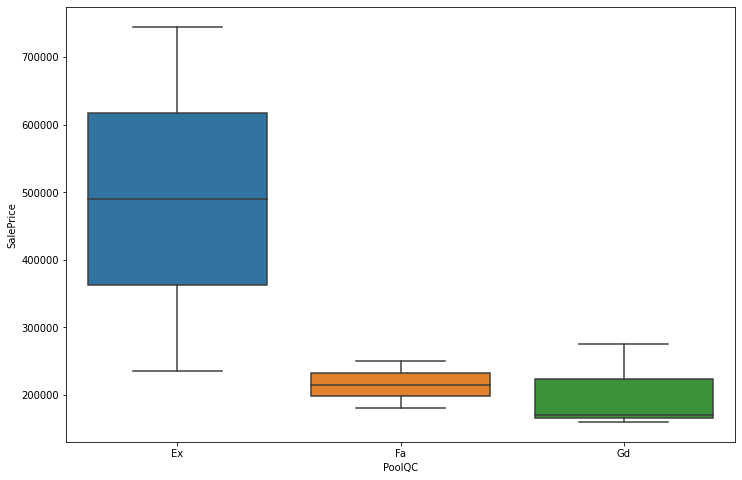

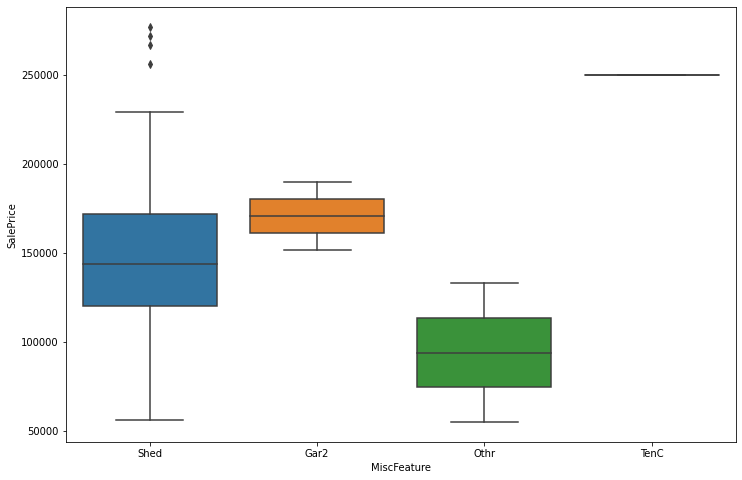

In [ ]:
dataCat = dataCat[['Neighborhood', 'Condition1', 'Condition2', 'RoofMatl', 'ExterQual', 'BsmtQual', 'BsmtCond', 'CentralAir', 'KitchenQual', 'GarageType', 'GarageFinish', 'PoolQC', 'MiscFeature']]
for titleData in dataCat.columns :
  plt.subplots(figsize=(12, 8))
  sns.boxplot(x=titleData, y="SalePrice", data=dataAll)

На основание различных значений категориальных признаков и соостветсвие им разных значений прогназируемой цены мы можем выделить данные признаки: 

Оставляем

* Neighborhood
* Condition2
* KitchenQual
* GarageType
* ExterQual

Отбрасываем:

* Condition1 - имеется слабая зависимость по сравнению с другими
* RoodMatl  - имеется слабая зависимость по сравнению с другими
* BsmtQual - одинаковая с ExterQual
* BsmtCond - имеется слабая зависимость по сравнению с другими
* CentralAir - имеется слабая зависимость по сравнению с другими
* GarageFinish - имеется слабая зависимость по сравнению с другими
* PoolQC - имеется слабая зависимость по сравнению с другими
* MiscFeature - имеется слабая зависимость по сравнению с другими

<font color='red'>

1) Нельзя только визуально, на основании ящиков с усами оценить, насколько связь между ценой и одним качественным признаком более слабая, чем с другим признаков. Для этого нужны числовые характеристики.
2) Для выбора качественных признаков для дальнейшей работы изначально можно исключить признаки со слишком большим числом пропущенных значений (такие как *PoolQC*) и по ящикам с усами и описанию признаков отбросить признаки, с которыми цена явно не будет иметь значимой связи (как, например, *LandSlope*).    
А вот для оставшихся нужно работать с таблицами сопряженности, критерием хи-квадрат и коэффициентом Крамера. Да, даже при разбиении цены на три интервала (условно, дома с низкой, средней и высокой ценой) в таблицах будет, скорей всего, много малочисленных частот - и тем более их будет много, когда вы будете составлять таблицы сопряженности для пар качественных признаков. Поэтому необходимо провести объединение значений признаков: руководствоваться при этом ящиками с усами (общий принцип: медиана у двух ящиков находится примерно на одном уровне, диапазон цен у одного ящика более-менее покрывается вторым - можно объединять), количеством записей с этим значением (желательно избавиться от малочисленных категорий) и описанием значений признаков (например, посмотреть, можно ли объединить похожие по типу материалы кровельного покрытия). С острожностью можно попробовать применять критерий хи-квадрат, когда порог в 20% превышен (но не намного).    
Да, работы тут много, поскольку на первоначальном этапе будет отобрано много качественных признаков, которые придется анализировать для объединения их значений. Но только так вы сможете отобрать адекватный топ наиболее сильно связанных с ценой признаков, а среди них найти сильно связанные между сообой.   
Хотя бы для выбраных вами 13 признаков (но лучше сначала выбрать больше признаков, чтобы потом оставить топ-10) надо было это проделать, чтобы показать, что там действительно есть значимая связь с ценой.

</font>

In [ ]:
dataCat = dataCat[['Neighborhood', 'Condition2', 'KitchenQual', 'GarageType', 'ExterQual']]

**Проанализируем взаимосвязи выделенных признаков между собой**

Распишем, что означает выделланый признак

* Neighborhood - физические местоположения в черте города Эймс
* Condition2 - близость к главной дороге или железной дороге (если есть вторая)
* KitchenQual - качество кухни
* GarageType - расположение гаража
* ExterQual - качество материалов экстерьера

In [ ]:
checkList = []

crosstabList = []

for columsTitle1  in dataCat.columns :
  for columsTitle2  in dataCat.columns :
    checkTitle1 = columsTitle1+'&'+columsTitle2
    checkTitle2 = columsTitle2+'&'+columsTitle1
    if not(checkTitle1 in checkList) and not(checkTitle2 in checkList) and checkTitle2!=checkTitle1:
      crosstab = pd.crosstab(dataCat[columsTitle1], dataCat[columsTitle2], margins = True)
      print(crosstab, "\n")
      crosstabList.append(crosstab)
      checkList.append(checkTitle1)
      checkList.append(checkTitle2)

Condition2    Artery  Feedr  Norm  PosA  PosN  RRAe  RRAn  RRNn   All
Neighborhood                                                         
Blmngtn            0      0    17     0     0     0     0     0    17
Blueste            0      0     2     0     0     0     0     0     2
BrDale             0      0    16     0     0     0     0     0    16
BrkSide            1      4    52     0     0     0     0     1    58
ClearCr            0      0    28     0     0     0     0     0    28
CollgCr            0      0   150     0     0     0     0     0   150
Crawfor            0      0    51     0     0     0     0     0    51
Edwards            0      0    99     0     1     0     0     0   100
Gilbert            0      0    79     0     0     0     0     0    79
IDOTRR             0      1    36     0     0     0     0     0    37
MeadowV            0      0    17     0     0     0     0     0    17
Mitchel            0      0    49     0     0     0     0     0    49
NAmes              0

**Проверим на надежность $\chi^2$** 

In [ ]:
for crosstab in crosstabList:
  crosstabNP = np.array(crosstab)
  count = 0
  for i  in range(0, len(crosstabNP)-1):
    for j  in range(0, len(crosstabNP[i])-1):
      if crosstabNP[i][j] < 5:
        count+=1
  print(count/(len(crosstabNP) * len(crosstabNP[0]))*100)

75.21367521367522
38.46153846153847
61.53846153846154
46.92307692307692
62.22222222222222
66.66666666666666
60.0
28.57142857142857
20.0
37.142857142857146


Как мы видим надежным мы можем считать только ExterQual KitchenQual

**Попробуем объединить значения наших признаков**

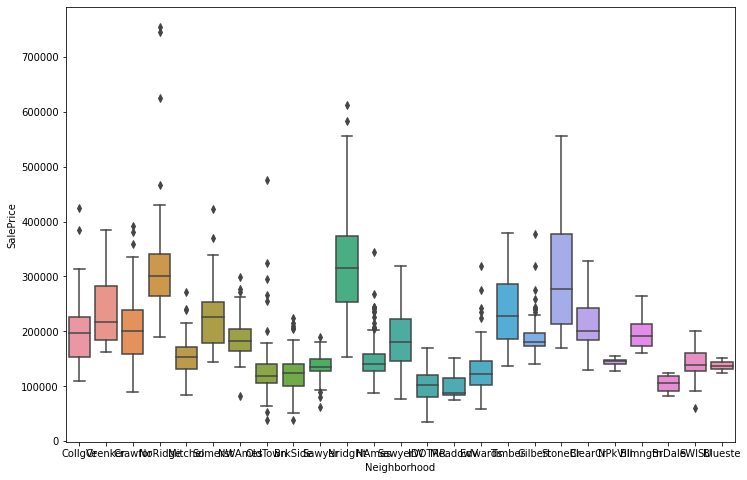

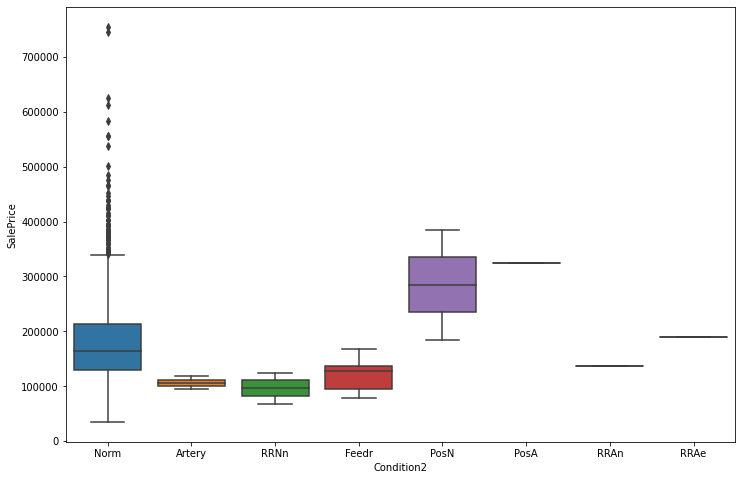

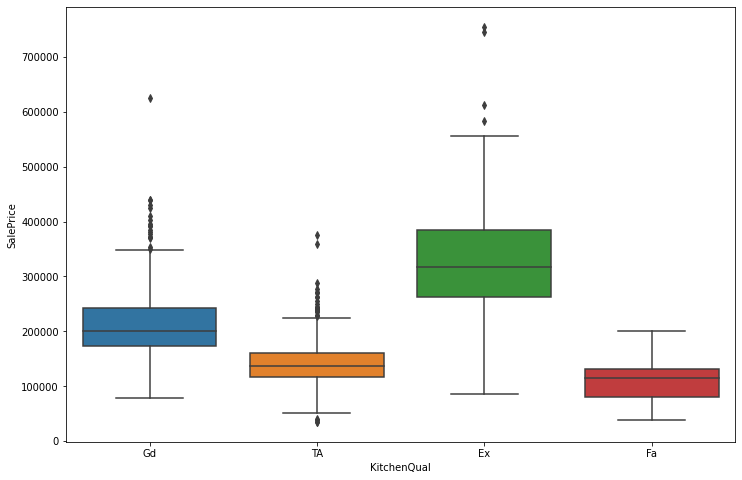

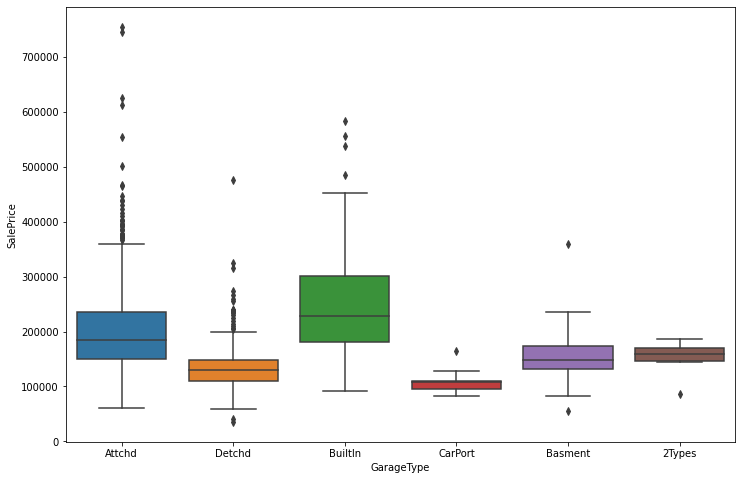

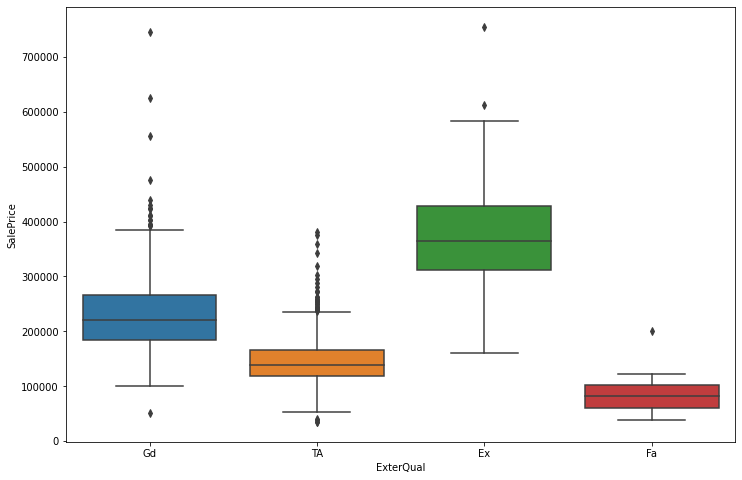

In [ ]:
for titleData in dataCat.columns :
  plt.subplots(figsize=(12, 8))
  sns.boxplot(x=titleData, y="SalePrice", data=dataAll)

На основание графика "ящик с усами" мы можем объедигинь:

1) В признаке **Neighborhood** значения , Edwards, Gilbert и IDOTRR, а так же NPkVill и NWAmes, так как их медианы промерно равны

2) В признаке **Condition2** значения Artety, RRAn RRNn и Feedr, а так же PosA c PosN и значение RRAe с значением Norm, так как их ящики и медианы промерно равны

3) В признаке **KitchenQual** значения Fa и TA, так как их медианы промерно равны

4) В признаке **GarageType** значения Basment, Detchd и 2Types, так как их медианы промерно равны

<font color='red'></font>

Совершим объединение

In [ ]:
dataCat['Neighborhood'] = dataAll['Neighborhood'].replace(['Edwards', 'Gilbert'], 'IDOTRR').replace('NPkVill', 'NWAmes')
dataCat['Condition2'] = dataAll['Condition2'].replace(['Artety', 'RRAn' 'RRNn'], 'RRAe').replace(['PosA','PosN'], 'Norm')
dataCat['KitchenQual'] = dataAll['KitchenQual'].replace('Fa', 'TA')
dataCat['GarageType'] = dataAll['GarageType'].replace([ 'Basment', 'Detchd'], '2Types')

<font color='red'>Почему проведенное объединение у вас отличается от заявленного выше?   
Вы же собирались еще и *Feedr* (признак *Condition2*) объединить с *Artety*, *RRAn* и *RRNn*. А *Norm* вы планировали объединить с с *RRAe*, но не с *PosA*, *PosN* (которые планировали объединить друг с другом). Объединять значения *Norm* с *PosN* не следует: по ящикам с усами видно, что там разный ценовой диапазон.
</font>   


**Проверим на надежность $\chi^2$** 


In [ ]:
checkList = []
crosstabList = []
titleCrosstabList = []

for columsTitle1  in dataCat.columns :
  for columsTitle2  in dataCat.columns :
    checkTitle1 = columsTitle1+'&'+columsTitle2
    checkTitle2 = columsTitle2+'&'+columsTitle1
    if not(checkTitle1 in checkList) and not(checkTitle2 in checkList) and checkTitle2!=checkTitle1:
      crosstab = pd.crosstab(dataCat[columsTitle1], dataCat[columsTitle2], margins = True)
      print(crosstab, "\n")
      crosstabList.append(crosstab)
      titleCrosstabList.append(checkTitle1)
      checkList.append(checkTitle1)
      checkList.append(checkTitle2)

Condition2    Artery  Feedr  Norm  RRAe  RRAn  RRNn   All
Neighborhood                                             
Blmngtn            0      0    17     0     0     0    17
Blueste            0      0     2     0     0     0     2
BrDale             0      0    16     0     0     0    16
BrkSide            1      4    52     0     0     1    58
ClearCr            0      0    28     0     0     0    28
CollgCr            0      0   150     0     0     0   150
Crawfor            0      0    51     0     0     0    51
IDOTRR             0      1   215     0     0     0   216
MeadowV            0      0    17     0     0     0    17
Mitchel            0      0    49     0     0     0    49
NAmes              0      0   225     0     0     0   225
NWAmes             0      0    81     0     1     0    82
NoRidge            0      0    41     0     0     0    41
NridgHt            0      0    77     0     0     0    77
OldTown            1      1   110     0     0     1   113
SWISU         

In [ ]:
for iCros in range(0, len(crosstabList)):
  crosstabNP = np.array(crosstabList[iCros])
  count = 0
  for i  in range(0, len(crosstabNP)-1):
    for j  in range(0, len(crosstabNP[i])-1):
      if crosstabNP[i][j] < 5:
        count+=1
  print(titleCrosstabList[iCros], count/(len(crosstabNP) * len(crosstabNP[0]))*100, "%")

Neighborhood&Condition2 68.94409937888199 %
Neighborhood&KitchenQual 27.173913043478258 %
Neighborhood&GarageType 46.95652173913044 %
Neighborhood&ExterQual 45.21739130434783 %
Condition2&KitchenQual 50.0 %
Condition2&GarageType 57.14285714285714 %
Condition2&ExterQual 54.285714285714285 %
KitchenQual&GarageType 10.0 %
KitchenQual&ExterQual 15.0 %
GarageType&ExterQual 24.0 %


Как мы видим надежным можно считать только 2 критерия $\chi^2$:

1) GarageType&KitchenQual  

2) ExterQual&KitchenQual

$H_0$ : Две переменные независимы.

$H_1$ : Две переменные не являются независимыми.

In [ ]:
for i in range(0, len(crosstabList)):
  if sts.chi2_contingency(crosstabList[i]).pvalue > 0.05:
    print("Отвергаем нулевую гипотезу для связи под номером - ", titleCrosstabList[i])
  else :
    print("Принимаем нулевую гипотезу для связи под номером - ", titleCrosstabList[i])

Отвергаем нулевую гипотезу для связи под номером -  Neighborhood&Condition2
Принимаем нулевую гипотезу для связи под номером -  Neighborhood&KitchenQual
Принимаем нулевую гипотезу для связи под номером -  Neighborhood&GarageType
Принимаем нулевую гипотезу для связи под номером -  Neighborhood&ExterQual
Отвергаем нулевую гипотезу для связи под номером -  Condition2&KitchenQual
Принимаем нулевую гипотезу для связи под номером -  Condition2&GarageType
Отвергаем нулевую гипотезу для связи под номером -  Condition2&ExterQual
Принимаем нулевую гипотезу для связи под номером -  KitchenQual&GarageType
Принимаем нулевую гипотезу для связи под номером -  KitchenQual&ExterQual
Принимаем нулевую гипотезу для связи под номером -  GarageType&ExterQual


Следовательно зависимость имеют параметры:

* Neighborhood & KitchenQual
* Neighborhood & GarageType
* Neighborhood & ExterQual
* Condition2 & GarageType
* KitchenQual & GarageType
* KitchenQual & ExterQual
* GarageType & ExterQual

<font color='red'>Вы же сами проверили надежность критерия и в итоге все равно используете его для всех пар?</font>

In [ ]:
def calculateCramers(data):
  global sts, np
  chi2 = sts.chi2_contingency (data, correction= False )[0]
  n = np.sum(data)
  minDim = min(data.shape) - 1
  return np.sqrt((chi2/n) / minDim)

# не расчитал времени на работу, есть ошибки в расчетах коэффициента  Крамера и Хи^2 :)
for i in range(0, len(crosstabList)):
  print("Коэффициента  Крамера для связи ", titleCrosstabList[i], calculateCramers(crosstabList[i]))

Коэффициента  Крамера для связи  Neighborhood&Condition2 Condition2
Artery    2.368817
Feedr     1.367637
Norm      0.088036
RRAe      3.350013
RRAn      3.350013
RRNn      2.368817
All       0.087674
dtype: float64
Коэффициента  Крамера для связи  Neighborhood&KitchenQual KitchenQual
Ex     1.142400
Gd     0.471921
TA     0.410627
All    0.298980
dtype: float64
Коэффициента  Крамера для связи  Neighborhood&GarageType GarageType
2Types     0.408382
Attchd     0.281032
BuiltIn    0.883636
CarPort    2.763081
All        0.223220
dtype: float64
Коэффициента  Крамера для связи  Neighborhood&ExterQual ExterQual
Ex     1.550901
Fa     2.988971
Gd     0.506263
TA     0.371554
All    0.292691
dtype: float64
Коэффициента  Крамера для связи  Condition2&KitchenQual KitchenQual
Ex     0.112935
Gd     0.046653
TA     0.040594
All    0.029556
dtype: float64
Коэффициента  Крамера для связи  Condition2&GarageType GarageType
2Types     0.177036
Attchd     0.121829
BuiltIn    0.383062
CarPort    1.19781

<font color='red'>Коэффициент Крамера считается не для значений признака, а для самих признаков. Таблице сопряженности соотвествует один коэффициент Крамера, а не множество. И нет никакого смысла считать его для тех пар, где нулевая гипотеза была принята (нет связи - силу чего тогда оцениввать?). Ну и если критерий хи-квадрат ненадежный, то и коэффициент Крамера будет ненадежным.Имела смысл вернуться к объединению категорий и посмотреть, нельзя ли что еще сделать с малочисленными категориями.</font>